In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
np.set_printoptions(formatter={'float': lambda x: '%.3f' % x})

Resampling methods
===

### Resampling

- Sampling with and without replacement
- Bootstrap (using sampling with replacement)
- Jackknife (using subsets)
- Cross validation and LOOCV (using subsets)
- Permutation resampling (switching labels)

### Simulations

- Design of experiments
- Power from simulations
- Hypothesis testing from simulations
- Empirical CDF
- Density estimation

### Setting the random seed

In [3]:
np.random.seed(123)

Resampling
----

### Sampling with and without replacement

#### Sampling with replacement

In [4]:
# Sampling is done with replacement by default
np.random.choice(4, 12)

array([2, 1, 2, 2, 0, 2, 2, 1, 3, 2, 3, 1])

In [5]:
# Probability weights can be given
np.random.choice(4, 12, p=[.4, .1, .1, .4])

array([3, 3, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0])

In [6]:
x = np.random.randint(0, 10, (8, 12))
x

array([[7, 2, 4, 8, 0, 7, 9, 3, 4, 6, 1, 5],
       [6, 2, 1, 8, 3, 5, 0, 2, 6, 2, 4, 4],
       [6, 3, 0, 6, 4, 7, 6, 7, 1, 5, 7, 9],
       [2, 4, 8, 1, 2, 1, 1, 3, 5, 9, 0, 8],
       [1, 6, 3, 3, 5, 9, 7, 9, 2, 3, 3, 3],
       [8, 6, 9, 7, 6, 3, 9, 6, 6, 6, 1, 3],
       [4, 3, 1, 0, 5, 8, 6, 8, 9, 1, 0, 3],
       [1, 3, 4, 7, 6, 1, 4, 3, 3, 7, 6, 8]])

In [7]:
# sampling individual elements
np.random.choice(x.ravel(), 12)

array([1, 2, 4, 7, 1, 2, 2, 6, 7, 3, 8, 4])

In [8]:
# sampling rows
idx = np.random.choice(x.shape[0], 4)
x[idx, :]

array([[4, 3, 1, 0, 5, 8, 6, 8, 9, 1, 0, 3],
       [4, 3, 1, 0, 5, 8, 6, 8, 9, 1, 0, 3],
       [6, 2, 1, 8, 3, 5, 0, 2, 6, 2, 4, 4],
       [4, 3, 1, 0, 5, 8, 6, 8, 9, 1, 0, 3]])

In [9]:
# sampling columns
idx = np.random.choice(x.shape[1], 4)
x[:, idx]

array([[9, 4, 3, 1],
       [0, 6, 2, 4],
       [6, 1, 7, 7],
       [1, 5, 3, 0],
       [7, 2, 9, 3],
       [9, 6, 6, 1],
       [6, 9, 8, 0],
       [4, 3, 3, 6]])

#### Sampling without replacement

In [10]:
# Give the argument replace=False
try:
    np.random.choice(4, 12, replace=False)
except ValueError, e:
    print e

Cannot take a larger sample than population when 'replace=False'


#### Random shuffling

You will likely have used this for the stochastic gradient descent homework.

In [11]:
x

array([[7, 2, 4, 8, 0, 7, 9, 3, 4, 6, 1, 5],
       [6, 2, 1, 8, 3, 5, 0, 2, 6, 2, 4, 4],
       [6, 3, 0, 6, 4, 7, 6, 7, 1, 5, 7, 9],
       [2, 4, 8, 1, 2, 1, 1, 3, 5, 9, 0, 8],
       [1, 6, 3, 3, 5, 9, 7, 9, 2, 3, 3, 3],
       [8, 6, 9, 7, 6, 3, 9, 6, 6, 6, 1, 3],
       [4, 3, 1, 0, 5, 8, 6, 8, 9, 1, 0, 3],
       [1, 3, 4, 7, 6, 1, 4, 3, 3, 7, 6, 8]])

In [12]:
# Shuffling occurs "in place" for efficiency
np.random.shuffle(x)
x

array([[7, 2, 4, 8, 0, 7, 9, 3, 4, 6, 1, 5],
       [4, 3, 1, 0, 5, 8, 6, 8, 9, 1, 0, 3],
       [8, 6, 9, 7, 6, 3, 9, 6, 6, 6, 1, 3],
       [2, 4, 8, 1, 2, 1, 1, 3, 5, 9, 0, 8],
       [6, 3, 0, 6, 4, 7, 6, 7, 1, 5, 7, 9],
       [6, 2, 1, 8, 3, 5, 0, 2, 6, 2, 4, 4],
       [1, 3, 4, 7, 6, 1, 4, 3, 3, 7, 6, 8],
       [1, 6, 3, 3, 5, 9, 7, 9, 2, 3, 3, 3]])

In [13]:

# To shuffle columns instead, transpose before shuffling
np.random.shuffle(x.T)
x

array([[7, 0, 4, 7, 9, 8, 1, 6, 4, 3, 2, 5],
       [8, 5, 1, 4, 6, 0, 0, 1, 9, 8, 3, 3],
       [3, 6, 9, 8, 9, 7, 1, 6, 6, 6, 6, 3],
       [1, 2, 8, 2, 1, 1, 0, 9, 5, 3, 4, 8],
       [7, 4, 0, 6, 6, 6, 7, 5, 1, 7, 3, 9],
       [5, 3, 1, 6, 0, 8, 4, 2, 6, 2, 2, 4],
       [1, 6, 4, 1, 4, 7, 6, 7, 3, 3, 3, 8],
       [9, 5, 3, 1, 7, 3, 3, 3, 2, 9, 6, 3]])

In [14]:
# numpy.random.permutation does the same thing but returns a copy
np.random.permutation(x)

array([[7, 0, 4, 7, 9, 8, 1, 6, 4, 3, 2, 5],
       [1, 6, 4, 1, 4, 7, 6, 7, 3, 3, 3, 8],
       [1, 2, 8, 2, 1, 1, 0, 9, 5, 3, 4, 8],
       [7, 4, 0, 6, 6, 6, 7, 5, 1, 7, 3, 9],
       [9, 5, 3, 1, 7, 3, 3, 3, 2, 9, 6, 3],
       [3, 6, 9, 8, 9, 7, 1, 6, 6, 6, 6, 3],
       [8, 5, 1, 4, 6, 0, 0, 1, 9, 8, 3, 3],
       [5, 3, 1, 6, 0, 8, 4, 2, 6, 2, 2, 4]])

In [15]:
# When given an integre n, permutation treats is as the array arange(n)
np.random.permutation(10)

array([4, 0, 6, 7, 5, 1, 8, 2, 3, 9])

In [16]:
# Use indices if you needed to shuffle collections of arrays in synchrony
x = np.arange(12).reshape(4,3)
y = x + 10
idx = np.random.permutation(x.shape[0])
print x[idx, :], '\n'
print y[idx, :]

[[ 9 10 11]
 [ 3  4  5]
 [ 6  7  8]
 [ 0  1  2]] 

[[19 20 21]
 [13 14 15]
 [16 17 18]
 [10 11 12]]


## Bootstrap

The bootstrap is commonly used to estimate statistics when theory fails. We have already seen the bootstrap for estiamting confidence bounds for convergence in the Monte Carlo integration.

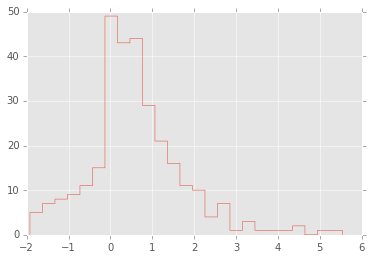

In [17]:
# For example, what is the 95% confidence interval for 
# the mean of this data set if you didn't know how it was generated?

x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step');

In [18]:
n = len(x)
reps = 10000
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()

np.percentile(mb, [2.5, 97.5])

array([0.483, 0.740])

#### Reprise of bootstrap example for Monte Carlo integration

In [19]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

In [20]:
# data sample for integration
n = 100
x = f(np.random.random(n))

In [21]:
# bootstrap MC integration
reps = 1000
xb = np.random.choice(x, (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)

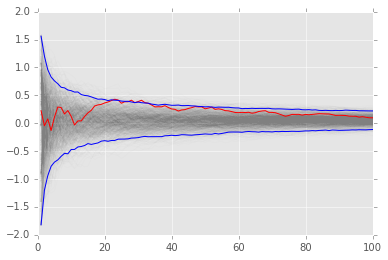

In [22]:
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

## Leave some-out resampling

#### Jackknife estimate of parameters

This shows the leave-one-out calculation idiom for Python. Unlike R, a -k index to an array does not delete the kth entry, but returns the kth entry from the end, so we need another way to efficiently drop one scalar or vector. This can be done using Boolean indexing as shown in the examples below, and is efficient since the operations are on *views* of the origianl array rather thna *copies*.

In [23]:
def jackknife(x, func):
    """Jackknife estimate of the estimator func"""
    n = len(x)
    idx = np.arange(n)
    return np.sum(func(x[idx!=i]) for i in range(n))/float(n)

In [24]:
# Jackknife estimate of standard deviation
x = np.random.normal(0, 2, 100)
jackknife(x, np.std)

1.9223

In [25]:
def jackknife_var(x, func):
    """Jackknife estiamte of the variance of the estimator func."""
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, func)
    return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0 
                                    for i in range(n))

In [26]:
# estimate of the variance of an estimator 
jackknife_var(x, np.std)

0.0254

#### Leave one out cross validation (LOOCV)

LOOCV also uses the same idiom, and a simple example of LOOCV for model selection is illustrated.

In [27]:
a, b, c = 1, 2, 3
x = np.linspace(0, 5, 10)
y = a*x**2 + b*x + c + np.random.normal(0, 1, len(x))

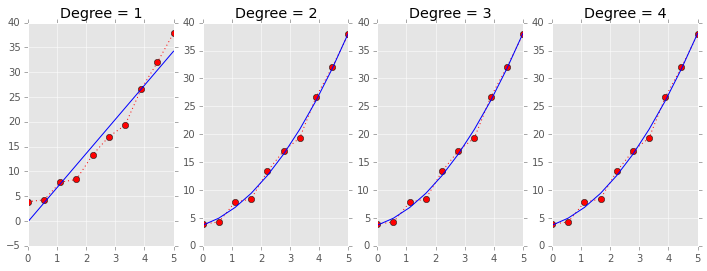

In [28]:
plt.figure(figsize=(12,4))
for deg in range(1, 5):
    plt.subplot(1, 4, deg)
    beta = np.polyfit(x, y, deg)
    plt.plot(x, y, 'r:o')
    plt.plot(x, np.polyval(beta, x), 'b-')
    plt.title('Degree = %d' % deg)

In [29]:
def loocv(x, y, fit, pred, deg):
    """LOOCV RSS for fitting a polynomial model."""
    n = len(x)
    idx = np.arange(n)
    rss = np.sum([(y - pred(fit(x[idx!=i], y[idx!=i], deg), x))**2.0 for i in range(n)])
    return rss

In [30]:
# RSS does not detect overfitting and selects the most complex model
for deg in range(1, 5):
    print 'Degree = %d, RSS=%.2f' % (deg, np.sum((y - np.polyval(np.polyfit(x, y, deg), x))**2.0))

Degree = 1, RSS=59.90
Degree = 2, RSS=6.20
Degree = 3, RSS=6.20
Degree = 4, RSS=6.20


In [31]:
# LOOCV selects the correct model
for deg in range(1, 5):
    print 'Degree = %d, RSS=%.2f' % (deg, loocv(x, y, np.polyfit, np.polyval, deg))

Degree = 1, RSS=628.41
Degree = 2, RSS=64.35
Degree = 3, RSS=67.81
Degree = 4, RSS=85.39


### Calculation of Cook's distance

Cook's distance is used to estimate the influence of a data point when performing least squares regression analysis. It is one of the standard plots for linear regression in R and provides another example of the applicationof leave-one-out resampling.

$$
D_i = \frac{\sum_{j=1}^n (\hat Y_j - \hat Y_{j(i)})^2}{p\  \text{MSE}}
$$

The calculation of Cook's distance involves the fitting of $n$ regression models, so we want to do this as efficiently as possible. 

In [32]:
def cook_dist(X, y, model):
    """Vectorized version of Cook's distance."""
    n = len(X)
    fitted = model(y, X).fit()
    yhat = fitted.predict(X)
    p = len(fitted.params)
    mse = np.sum((yhat - y)**2.0)/n
    denom = p*mse
    idx = np.arange(n)
    return np.array([np.sum((yhat - model(y[idx!=i], X[idx!=i]).fit().predict(X))**2.0) for i in range(n)])/denom

In [33]:
import statsmodels.api as sm

In [34]:
# create data set with outliers
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)
beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e
y[[7, 29, 78]] *= 3

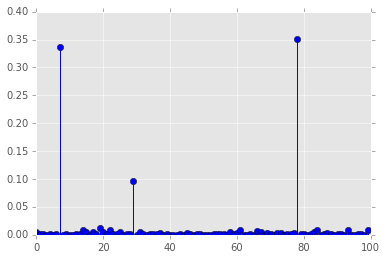

In [35]:
# use Cook's distance to identify outliers
model = sm.OLS
d = cook_dist(X, y, model)
plt.stem(d);

### Permutation resampling

Permuatation resampling is used ot generate the null distribtuion of labeled data by switching lebals. Because the number of permuations grows so fast, it is typically only feasible to use a Monte Carlo sample of the possible set of permuations in computation.

In [36]:
# Growth of the factorial function (number of permutations) using Stirling's approximation

def stirling(n):
    """Stirling's approximation to the factorial."""
    return np.sqrt(2*np.pi*n)*(n/np.e)**n

n = np.arange(1, 51)
zip(n, stirling(n))

[(1, 0.9221),
 (2, 1.9190),
 (3, 5.8362),
 (4, 23.5062),
 (5, 118.0192),
 (6, 710.0782),
 (7, 4980.3958),
 (8, 39902.3955),
 (9, 359536.8728),
 (10, 3598695.6187),
 (11, 39615625.0506),
 (12, 475687486.4728),
 (13, 6187239475.1927),
 (14, 86661001740.5988),
 (15, 1300430722199.4680),
 (16, 20814114415223.1367),
 (17, 353948328666101.1250),
 (18, 6372804626194313.0000),
 (19, 121112786592294192.0000),
 (20, 2422786846761135104.0000),
 (21, 50888617325509746688.0000),
 (22, 1119751494628237770752.0000),
 (23, 25758525370529310834688.0000),
 (24, 618297927022794799841280.0000),
 (25, 15459594834691181359661056.0000),
 (26, 402000993060955330726330368.0000),
 (27, 10855315170319531497075245056.0000),
 (28, 303982326243341862218743414784.0000),
 (29, 8816392105377489957715009601536.0000),
 (30, 264517095922965156800687262138368.0000),
 (31, 8200764697241122458512884083195904.0000),
 (32, 262446514081933026899914856968749056.0000),
 (33, 8661418381417958431306228879169945600.0000),
 (34, 294

#### For flexible hypothesis testing

Suppose you have 2 data sets from unknown distribution and you want to test if some arbitrary statistic (e.g 7th percentile) is the same in the 2 data sets - what can you do?

An appropirate test statistic is the difference between the 7th percentile, and if we knew the null distribution of this statisic, we could test for the null hypothesis that the statistic = 0. Permuting the labels of the 2 data sets allows us to create the empirical null distribution.

In [37]:
x = np.concatenate([np.random.exponential(size=200), 
                    np.random.normal(0, 1, size=100)])
y = np.concatenate([np.random.exponential(size=250), 
                    np.random.normal(0, 1, size=50)])

In [38]:
n1, n2 = map(len, (x, y))
reps = 10000

data = np.concatenate([x, y])
ps = np.array([np.random.permutation(n1+n2) for i in range(reps)])

In [39]:
xp = data[ps[:, :n1]]
yp = data[ps[:, n1:]]
samples = np.percentile(xp, 7, axis=1) - np.percentile(yp, 7, axis=1)

p-value = 0.0124


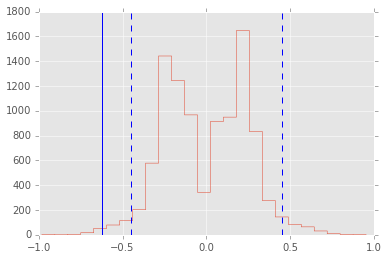

In [40]:
plt.hist(samples, 25, histtype='step')
test_stat = np.percentile(x, 7) - np.percentile(y, 7)
plt.axvline(test_stat)
plt.axvline(np.percentile(samples, 2.5), linestyle='--')
plt.axvline(np.percentile(samples, 97.5), linestyle='--')
print "p-value =", 2*np.sum(samples >= np.abs(test_stat))/reps

#### Adjusting p-values for multiple testing

We will make up some data - a tpical example is trying to identify genes that are differentially expressed in two groups of people, pehraps those who are helathy and those who are sick. For each gene, we can perform a t-test to see if the gene is differnetially expressed across the two groups at some nominal significanc level, typically 0.05. When we have many genes, this is unsatisfactory since 5% of the genes will be found to be differentially expressed just by chance.

One possible solution is to use the family-wise error rate instead - most simply using the Bonferroni adjusted p-value. An alternative is to use the non-parmaetric method originally proposed by Young and Westfall that uses permuation resampling to estimate the adjusted p-value without the assumptions of independence that the Bonferroni method makes.

See <http://www3.stat.sinica.edu.tw/statistica/oldpdf/A12n16.pdf> for an overview of statistical procedures in the context of gene expressiona array analysis, including descriptions of the p-value ajdustements shown here.

#### Making up data for 100 genes across 1000 subjects

In [41]:
np.random.seed(52)

ngenes = 100
ncases = 500
nctrls = 500
nsamples = ncases + nctrls
x = np.random.normal(0, 1, (ngenes, nsamples))

In [42]:
import scipy.stats as st

#### Unadjusted p-values

In [43]:
t, p0 = st.ttest_ind(x[:, :ncases], x[:, ncases:], axis=1)
idx = p0 < 0.05
zip(np.nonzero(idx)[0], p0[idx])

[(0, 0.0119),
 (10, 0.0368),
 (33, 0.0117),
 (36, 0.0144),
 (39, 0.0247),
 (44, 0.0051),
 (68, 0.0253),
 (97, 0.0366)]

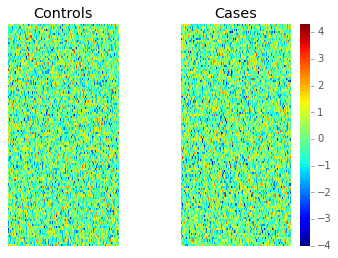

In [44]:
vmin = x.min()
vmax = x.max()

plt.subplot(121)
plt.imshow(x[:, :ncases], extent=[0, 1, 0, 2], interpolation='nearest', 
           vmin=vmin, vmax=vmax, cmap='jet')
plt.xticks([])
plt.yticks([])
plt.title('Controls')
plt.subplot(122)
plt.imshow(x[:, ncases:], extent=[0, 1, 0, 2], interpolation='nearest', 
           vmin=vmin, vmax=vmax, cmap='jet')
plt.xticks([])
plt.yticks([])
plt.title('Cases')
plt.colorbar();

#### Bonferroni

In [45]:
p1 = np.clip(ngenes * p0, 0, 1)
idx = p1 < 0.05
zip(np.nonzero(idx)[0], p1[idx])

[]

#### Concept of resampling based p-value ajdustment

The basic idea of resampling based p-value adjustemnt is quite simple to understand. Suppose we want to know the ajdusted p-value for the lowest observed p-value.

Repeat B times

- Permutate the case control labels 
- Calcuate the lowest p-value for the permutted data

The adjusted p-value is simply the number of permutation samples in which the lowest permuted p-value is smaller than the observed  lowest p-value, divided by the number of permutations.

The next lowest adjusted p-value is more complicated, since we need to maintain the ordering (i.e the second adjusted p-value must be larger than the smallest adjusted p-value), and one of several related algorithms developed by Young and Westfall is usually used. We will not cover this in this class as the goal is to understand how permuation resampling works rather than the complexiities of correcting for multiple testing, but an implementation is provided for those interested.

In [46]:
# Let's see if the smallest adjusted p-value is significant
k = 0
p0s = np.array(sorted(p0))
print "Gene\tUnadjusted p"
print np.argsort(p0)[k], '\t', p0s[k]

Gene	Unadjusted p
44 	0.00509946274404


In [47]:
# Do many permutations
nperms = 10000

ps = np.zeros(nperms)
for i in range(nperms):
    sidx = np.random.permutation(nsamples)
    y = x[:, sidx]
    pvals = st.ttest_ind(y[:, :ncases], y[:, ncases:], axis=1)[1]
    pvals.sort()
    ps[i] = pvals[k]

print "Gene\tUnadjusted p\t\tAdjusted p"
print np.argsort(p0[k]), '\t', p0s[k], '\t', np.sum(ps < p0s[k])/nperms

Gene	Unadjusted p		Adjusted p
0 	0.00509946274404 	0.4016


#### Westfall and Young (Permutation-resampling based family-wise error rate)

In [48]:
# This is the maxT step-down method
# Assumes that the distribution of T-statistics is the same for all genes

nperms = 10000
k = ngenes

counts = np.zeros((nperms, k))
ranks = np.argsort(np.abs(t))[::-1]
for i in range(nperms):
    u = np.zeros(k)
    sidx = np.random.permutation(nsamples)
    y = x[:, sidx]
    tb, pb = st.ttest_ind(y[:, :ncases], y[:, ncases:], axis=1)
    u[k-1] = np.abs(tb[ranks[k-1]])
    for j in range(k-2, -1, -1):
        u[j] = max(u[j+1], np.abs(tb[ranks[j]]))
    counts[i] = (u >= np.abs(t[ranks]))

p2 = np.sum(counts, axis=0)/nperms
for i in range(1, k):
    p2[i] = max(p2[i],p2[i-1])
idx = p2 < 0.05
zip(ranks, p2[idx])

[]

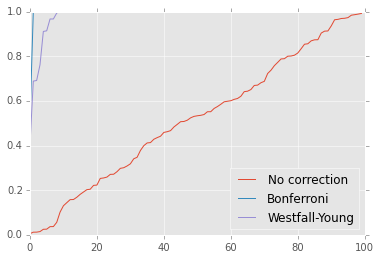

In [49]:
plt.plot(sorted(p0), label='No correction')
plt.plot(sorted(p1), label='Bonferroni')
plt.plot(sorted(p2), label='Westfall-Young')
plt.ylim([0,1])
plt.legend(loc='best');

#### What if genes are correlated?

The Bonferrroni assumes that tests are independent. However, often test resutls are strongly correlated (e.g. genes in the same pathway behave similalry) and the Bonferroni will be too conservative. However the permuation-resampling method still works in the presence of correaltions.

In [50]:
np.random.seed(52)

ngenes = 100
ncases = 500
nctrls = 500
nsamples = ncases + nctrls

x = np.repeat(np.random.normal(0, 1, (1, nsamples)), ngenes, axis=0)

In [51]:
# In this extreme case, we measure the same gene 100 times
x[:5, :5]

array([[0.519, -1.269, 0.240, -0.804, 0.017],
       [0.519, -1.269, 0.240, -0.804, 0.017],
       [0.519, -1.269, 0.240, -0.804, 0.017],
       [0.519, -1.269, 0.240, -0.804, 0.017],
       [0.519, -1.269, 0.240, -0.804, 0.017]])

#### Unadjusted p-values

In [52]:
t, p0 = st.ttest_ind(x[:, :ncases], x[:, ncases:], axis=1)
idx = p0 < 0.05
print 'Minimum p-value', p0.min(), '# significant', idx.sum()

Minimum p-value 0.0119317780363 # significant 100


#### Bonferroni

Bonferroni tells us none of the adjusted p-values are significant, which we know is the wrong answer.

In [53]:
p1 = np.clip(len(p0) * p0, 0, 1)
idx = p1 < 0.05
print 'Minimum p-value', p1.min(), '# significant', idx.sum()

Minimum p-value 1.0 # significant 0


#### Westfall and Young (Permutation-resampling based family-wise error rate)

This tells us that every gene is significant, which is the correct answer.

In [54]:
nperms = 10000

counts = np.zeros((nperms, k))
ranks = np.argsort(np.abs(t))[::-1]
for i in range(nperms):
    u = np.zeros(k)
    sidx = np.random.permutation(nsamples)
    y = x[:, sidx]
    tb, pb = st.ttest_ind(y[:, :ncases], y[:, ncases:], axis=1)
    u[k-1] = np.abs(tb[ranks[k-1]])
    for j in range(k-2, -1, -1):
        u[j] = max(u[j+1], np.abs(tb[ranks[j]]))
    counts[i] = (u >= np.abs(t[ranks]))

p2 = np.sum(counts, axis=0)/nperms
for i in range(1, k):
    p2[i] = max(p2[i],p2[i-1])
idx = p2 < 0.05
    
print 'Minimum p-value', p2.min(), '# significant', idx.sum()

Minimum p-value 0.0118 # significant 100


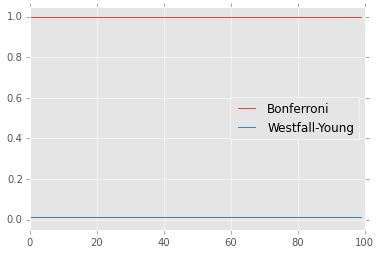

In [55]:
plt.plot(sorted(p1), label='Bonferroni')
plt.plot(sorted(p2), label='Westfall-Young')
plt.ylim([-0.05,1.05])
plt.legend(loc='best');

Monte Carlo Simulations
----

### Design of simulation experiments

Some experimental design routines (e.g. factorial, latin hypercube samplign) are proived  in [PyDOE](http://pythonhosted.org//pyDOE/index.html)

From [notes](http://www4.stat.ncsu.edu/~davidian/st810a/simulation_handout.pdf) by Marie Dravidian 

A Monte Carlo simulation is just like any other experiment

- Careful planning is required
- Factors that are of interest to vary in the experiment: sample size n,
distribution of the data, magnitude of variation, . . .
- Each combination of factors is a separate simulation, so that many
factors can lead to very large number of combinations and thus
number of simulations may be time consuming
- Can use experimental design principles
- Results must be recorded and saved in a systematic, sensible way
- Don’t only choose factors favorable to a method you have developed!
- Sample size S (number of data sets) must deliver acceptable precision

### Example: Simulations to estimate power

What sample size is needed for the t-test to have a power of 0.8 with an effect size of 0.5?

This is a toy example, since you can just use a pakcage to calculate it,  but the simulation approach works for *everything*, including arbitrarily complex experimental designs, correcting for multiple comparisons and so on(assuming infinite computational resources and you have some prior knowledge of the likely distribution of simulation parameters).

In [56]:
# Run nresps simulations
# The power is simply the fraction of reps where 
# the p-value is less than 0.05

nreps = 10000
d = 0.5

n = 50
power = 0
while power < 0.8:
    n1 = n2 = n
    x = np.random.normal(0, 1, (n1, nreps))
    y = np.random.normal(d, 1, (n2, nreps))
    t, p = st.ttest_ind(x, y)
    power = (p < 0.05).sum()/nreps
    print n, power
    n += 1

50 0.7002
51 0.706
52 0.7119
53 0.7181
54 0.7344
55 0.7351
56 0.7405
57 0.7583
58 0.761
59 0.7647
60 0.775
61 0.7878
62 0.7865
63 0.7913
64 0.8004


### Check with R

In [57]:
%load_ext rpy2.ipython

In [58]:
%%R
install.packages("pwr", repos ="http://cran.us.r-project.org")
library(pwr)

power.t.test(sig.level=0.05, power=0.8, delta = 0.5)

trying URL 'http://cran.us.r-project.org/bin/macosx/mavericks/contrib/3.1/pwr_1.1-2.tgz'
Content type 'application/x-gzip' length 53156 bytes (51 Kb)
opened URL
downloaded 51 Kb


The downloaded binary packages are in
	/var/folders/xf/rzdg30ps11g93j3w0h589q780000gn/T//RtmpWSpKKL/downloaded_packages

     Two-sample t test power calculation 

              n = 63.76576
          delta = 0.5
             sd = 1
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group



Characterizing Monte Carlo samples
----

Given a bunch of random numbers from a simulaiton experiment, one of the first steps is to visualize the CDF and PDF.

### Estimating the CDF

In [59]:
# Make up some random data
x = np.concatenate([np.random.normal(0, 1, 10000), 
                    np.random.normal(4, 1, 10000)])

In [60]:
# Roll our own ECDF function

def ecdf(x):
    """Return empirical CDF of x."""
    
    sx = np.sort(x)
    cdf = (1.0 + np.arange(len(sx)))/len(sx)
    return sx, cdf

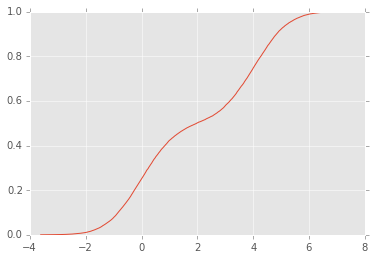

In [61]:
sx, y = ecdf(x)
plt.plot(sx, y);

#### Using library routines

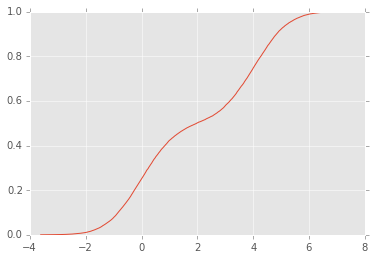

In [62]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(x)
plt.plot(ecdf.x, ecdf.y);

### Estimating the PDF

The simplest is to plot a normalized histogram as shown above, but we will also look at how to estimate density functions using kernel density estimation.

### Kernel density estimation

Kernel density estimation is a form of convolution, usually with a symmetric kenrel (e.g. a Gaussian). The degree of smoothing is determined by a bandwidth parameter. 

In [63]:
def epanechnikov(u):
    """Epanechnikov kernel."""
    return np.where(np.abs(u) <= np.sqrt(5), 3/(4*np.sqrt(5)) * (1 - u*u/5.0), 0)

In [1]:
def silverman(y):
    """Find bandwidth using heuristic suggested by Silverman
    .9 min(standard deviation, interquartile range/1.34)n-1/5
    """
    n = len(y)
    iqr = np.subtract(*np.percentile(y, [75, 25]))
    h = 0.9*np.min([y.std(ddof=1), iqr/1.34])*n**-0.2
    return h

In [65]:
def kde(x, y, bandwidth=silverman, kernel=epanechnikov):
    """Returns kernel density estimate.
    x are the points for evaluation
    y is the data to be fitted
    bandwidth is a function that returens the smoothing parameter h
    kernel is a function that gives weights to neighboring data
    """
    h = bandwidth(y)
    return np.sum(kernel((x-y[:, None])/h)/h, axis=0)/len(y)

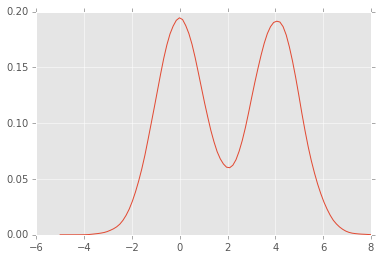

In [66]:
xs = np.linspace(-5,8,100)
density = kde(xs, x)
plt.plot(xs, density);

#### Using library routines

There are several kernel density estimation routines available in scipy, statsmodels and scikit-leran. Here we will use the scikits-learn and statsmodels routine as examples.

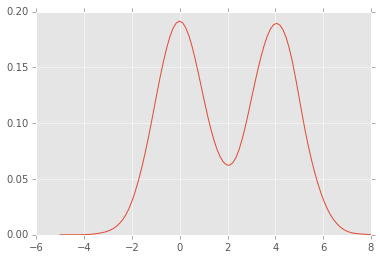

In [67]:
import statsmodels.api as sm

dens = sm.nonparametric.KDEUnivariate(x)
dens.fit(kernel='gau')
plt.plot(xs, dens.evaluate(xs));

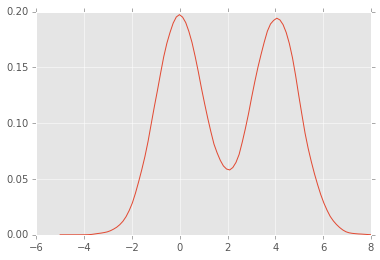

In [68]:
from sklearn.neighbors import KernelDensity 

# expects n x p matrix with p features
x.shape = (len(x), 1)
xs.shape = (len(xs), 1)

kde = KernelDensity(kernel='epanechnikov', bandwidth=0.5).fit(x)
dens = np.exp(kde.score_samples(xs))
plt.plot(xs, dens);

### Multivariate kerndel density estimation

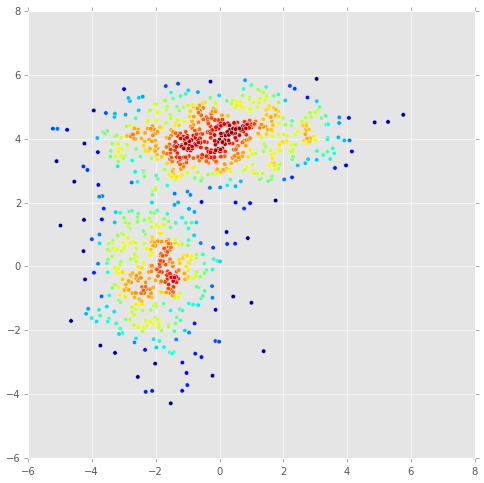

In [73]:
# create data set
n = 1000
_mus = np.array([[0,4], [-2,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
X = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n)) 
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
dens = kde.score_samples(X)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=dens);